# Famous Iris Dataset
The **Iris dataset** is a well-known dataset in the field of data science and machine learning. It is often used for classification tasks and to demonstrate various machine learning algorithms.

## Dataset Overview
The Iris dataset consists of **150 iris flowers**, with **50 samples** from each of three different species of iris flowers:
- **Iris setosa**
- **Iris versicolor**
- **Iris virginica**

## Features
The dataset contains **four features** (attributes) for each flower:
1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

## Objective
The main objective in many machine learning tasks involving the Iris dataset is to **classify the species of the iris flower** based on these four features.

## Why is it Popular?
This dataset is often used in tutorials and examples because it is:
- **Small** and manageable
- **Clean** with minimal missing data
- **Easy to visualize**, making it great for demonstrating basic machine learning concepts and algorithms like:
    - k-Nearest Neighbors (k-NN)
    - Decision trees
    - Linear classifiers

In [13]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model saving and loading
import joblib

In [2]:
# Load the Iris dataset
df = sns.load_dataset("iris")

# Save the dataset locally as a CSV file
df.to_csv("iris_dataset.csv", index=False)

# Verify if the file is saved correctly
print("Dataset saved as iris_dataset.csv")

Dataset saved as iris_dataset.csv


In [3]:
# Load Dataset 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Dataset Columns -
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Current Null Data:  sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


<AxesSubplot: >

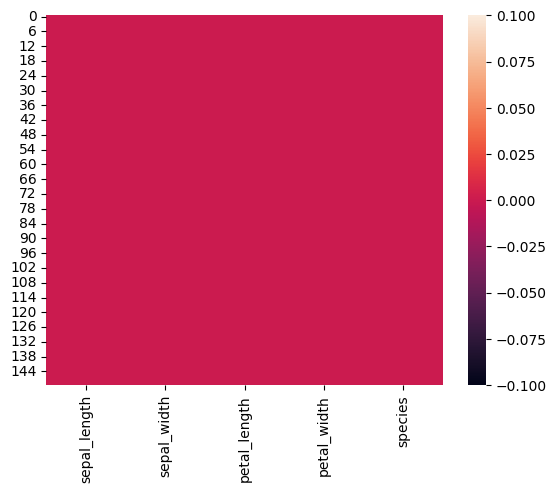

In [6]:
# Null Data
print("Current Null Data: ", df.isnull().sum())
sns.heatmap(df.isnull())

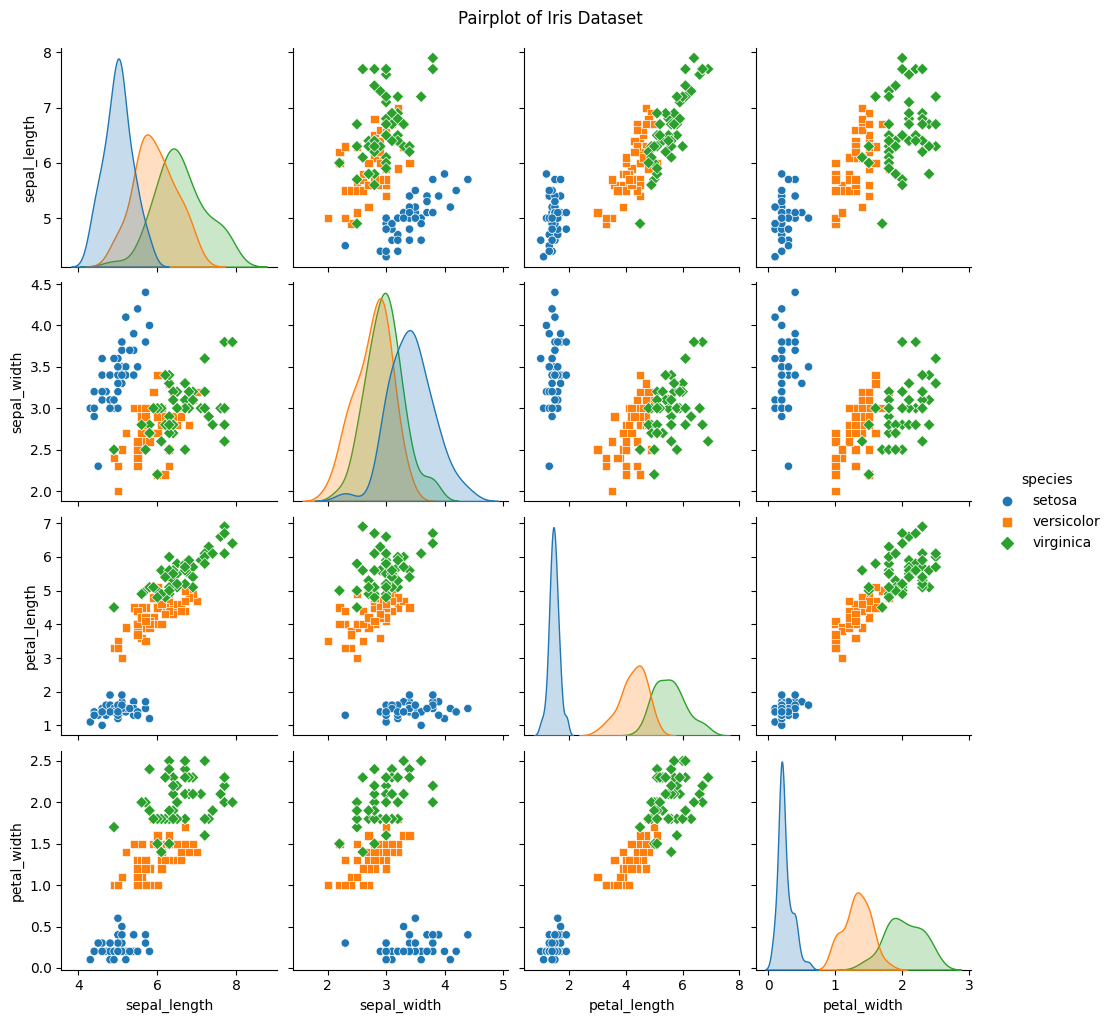

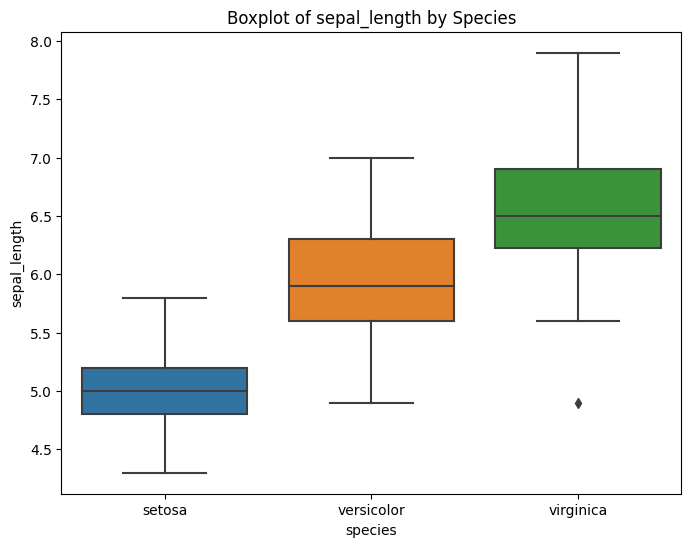

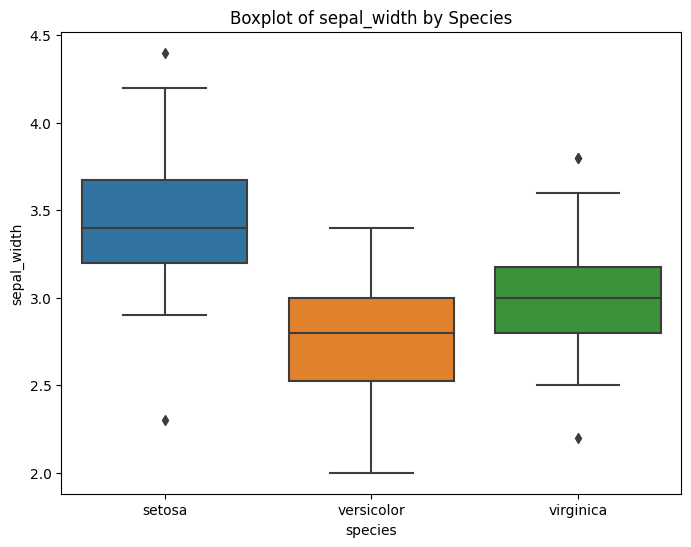

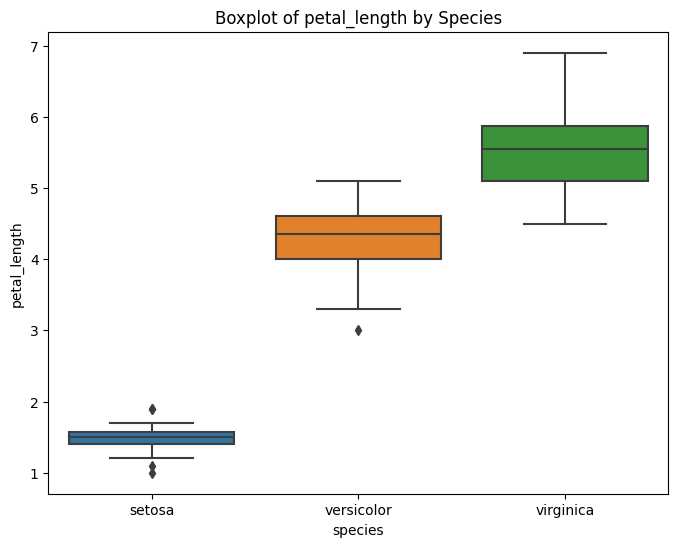

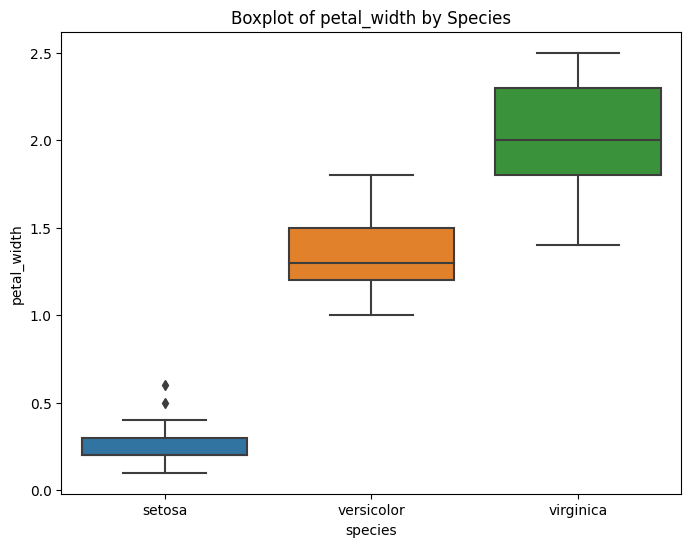

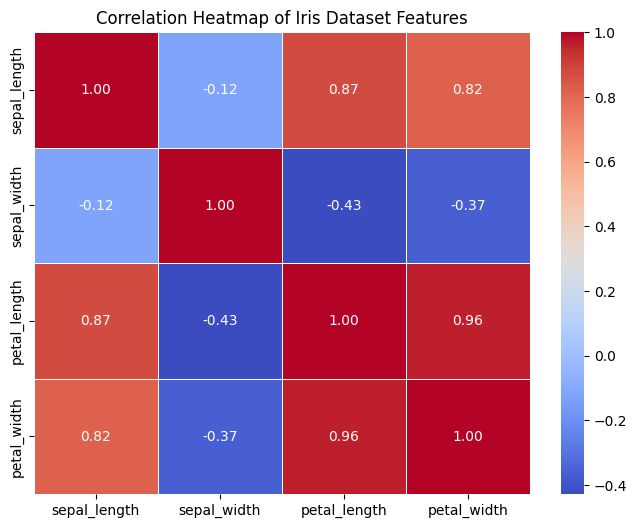

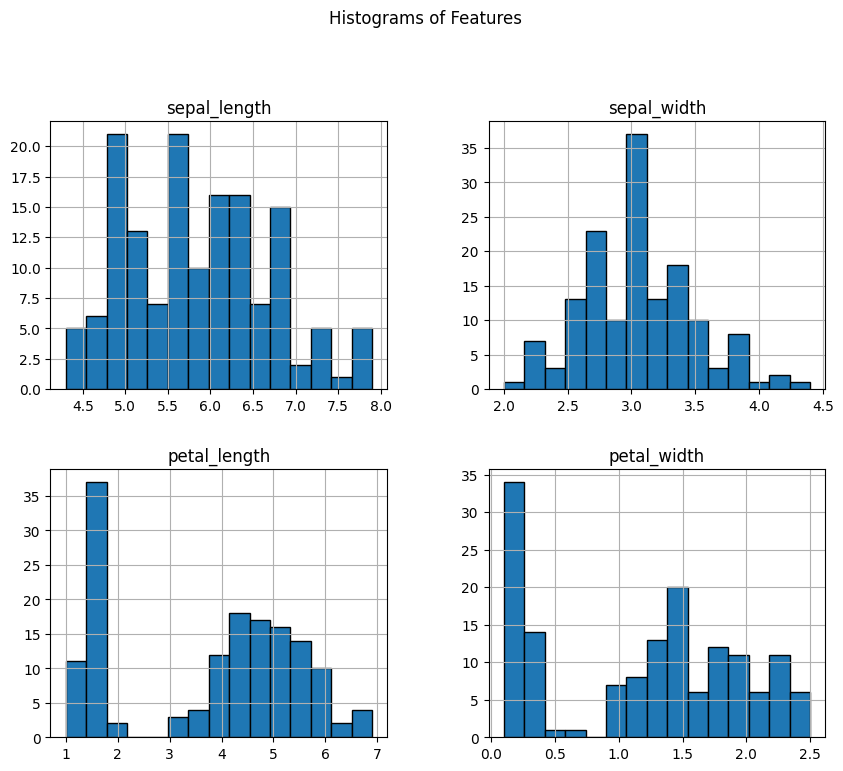

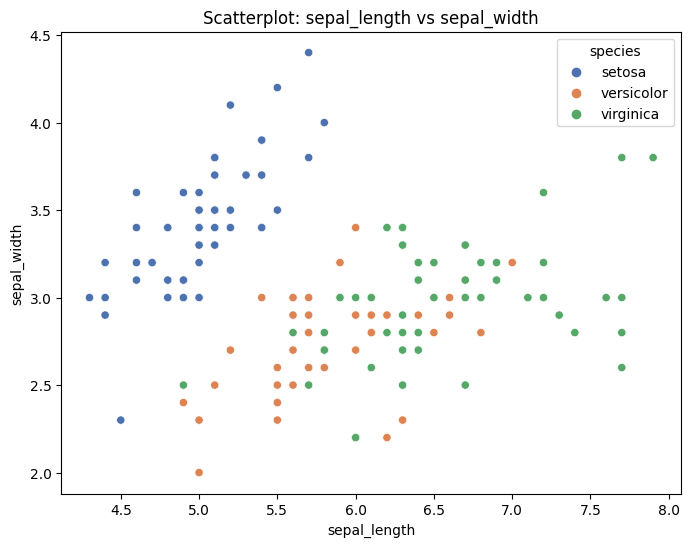

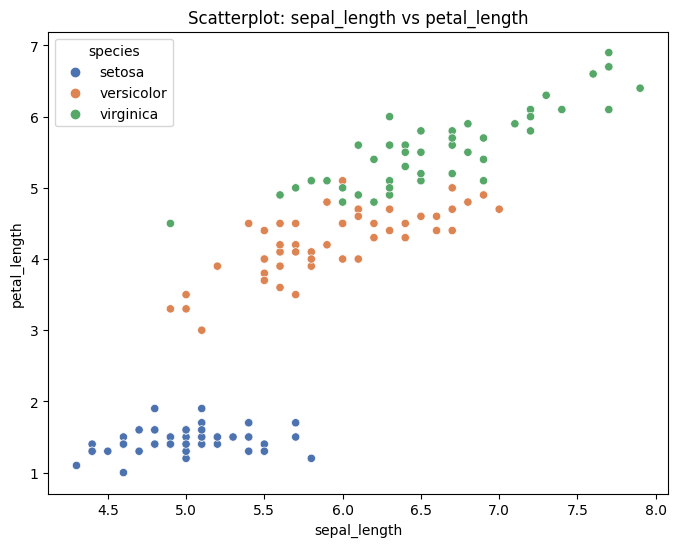

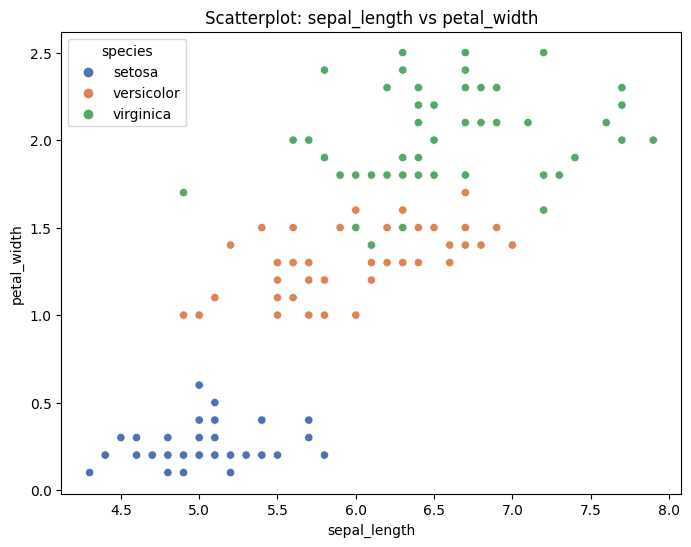

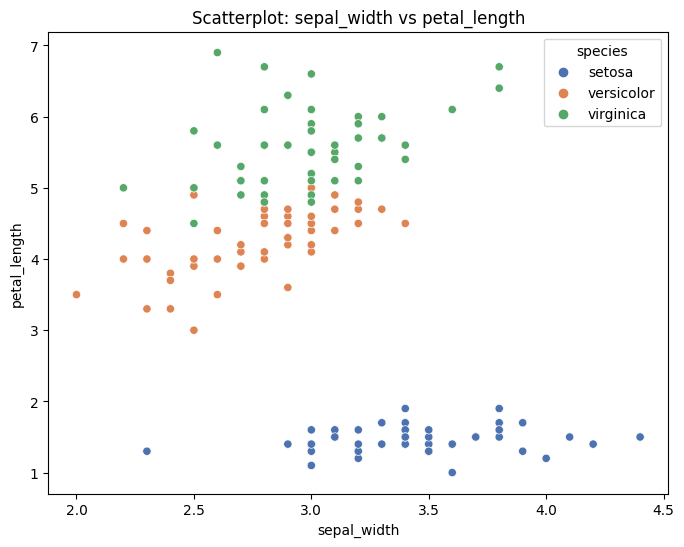

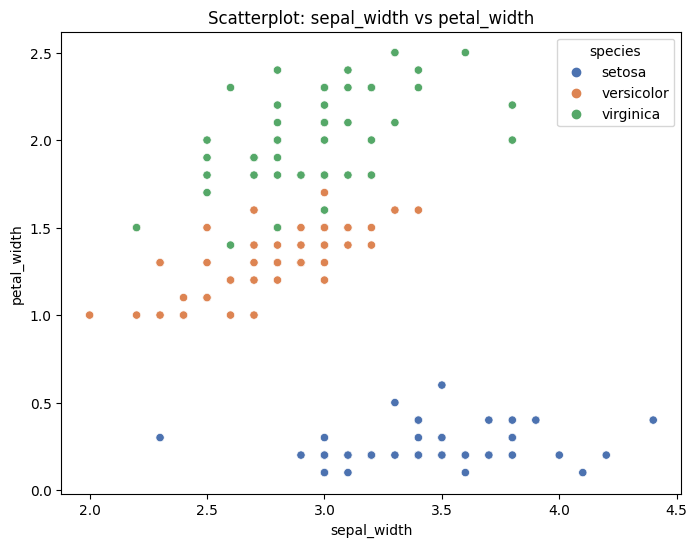

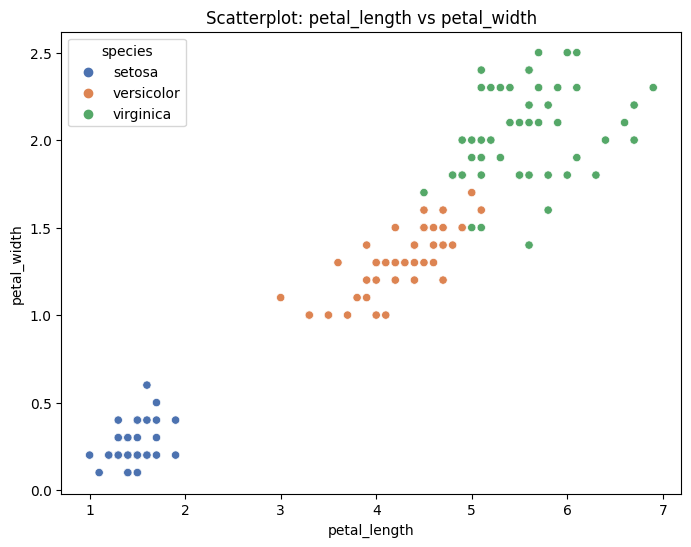

In [9]:
# Pairplot for all possible combinations of numerical features
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Boxplots for each feature by species
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"Boxplot of {feature} by Species")
    plt.show()

# Correlation Heatmap for numerical features (excluding 'species')
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop("species", axis=1).corr()  # Drop 'species' for numerical correlation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()

# Histograms for each feature
df.drop("species", axis=1).hist(bins=15, figsize=(10, 8), edgecolor='black', layout=(2, 2))
plt.suptitle("Histograms of Features", y=1.02)
plt.show()

# Pairwise scatter plots for all combinations of features (excluding species for clarity)
num_features = df.drop("species", axis=1).columns
for i in range(len(num_features)):
    for j in range(i+1, len(num_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=num_features[i], y=num_features[j], hue="species", data=df, palette="deep")
        plt.title(f"Scatterplot: {num_features[i]} vs {num_features[j]}")
        plt.show()


In [11]:
# 1. Summary Statistics for the entire dataset
summary_stats = df.describe()
print("Summary Statistics for the Iris Dataset:")
print(summary_stats)

# 2. Correlation matrix for numerical features
correlation_matrix = df.drop("species", axis=1).corr()  # Dropping the 'species' column for numerical analysis
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 3. Skewness and Kurtosis for each feature
skewness = df.drop("species", axis=1).apply(skew)
kurt = df.drop("species", axis=1).apply(kurtosis)

print("\nSkewness of features:")
print(skewness)

print("\nKurtosis of features:")
print(kurt)

# 4. Class-wise Statistics (grouped by 'species')
classwise_stats = df.groupby("species").describe().transpose()
print("\nClass-wise Statistics:")
print(classwise_stats)

Summary Statistics for the Iris Dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

Skewness of features:
sepal_length    0.311753
sepal_width    

In [12]:
# Separate the features (X) and target variable (y)
X = df.drop("species", axis=1)  # Features (numerical data)
y = df["species"]  # Target variable (species)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [14]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Initialize variables to keep track of the best model
best_model = None
best_accuracy = 0

# Loop through all models, train, evaluate, and print results
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Accuracy of {model_name}: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # If this model is the best, save it
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model



Training Logistic Regression...


c:\Users\om\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Training Support Vector Machine...
Accuracy of Support Vector Machine: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg      

In [15]:
# Save the best model using joblib
if best_model:
    print(f"\nSaving the best model: {best_model}")
    joblib.dump(best_model, "best_model.pkl")

print("\nBest model saved successfully!")


Saving the best model: LogisticRegression()

Best model saved successfully!


In [16]:
# Load the best model from the saved file
best_model = joblib.load("best_model.pkl")

# Single row of data to predict on
single_data = np.array([[5.1, 3.5, 1.4, 0.2]])

# Make the prediction
predicted_class = best_model.predict(single_data)

# Print the predicted class
print(f"The predicted class for the input data {single_data} is: {predicted_class[0]}")


The predicted class for the input data [[5.1 3.5 1.4 0.2]] is: setosa


c:\Users\om\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
